# Numerical Methods for Solving ODEs

## 1. Euler Method

The Euler method is the simplest numerical method for solving ordinary differential equations (ODEs) of the form:

$\frac{dy}{dx} = f(x,y)$ with initial condition $y(x_0) = y_0$

### Formula
The Euler method uses the following iterative formula:

$y_{n+1} = y_n + h f(x_n, y_n)$

where:
- $y_n$ is the solution at point $x_n$
- $h$ is the step size
- $x_{n+1} = x_n + h$

### Error Analysis
- Local truncation error: $O(h^2)$
- Global truncation error: $O(h)$

## 2. Runge-Kutta Methods

Runge-Kutta methods are a family of iterative methods that provide greater accuracy than the Euler method.

### 2.1 Runge-Kutta 2nd Order (RK2)

Also known as the modified Euler method or Heun's method.

#### Formula
For the ODE $\frac{dy}{dx} = f(x,y)$:

$k_1 = f(x_n, y_n)$
$k_2 = f(x_n + h, y_n + h k_1)$

$y_{n+1} = y_n + \frac{h}{2}(k_1 + k_2)$

where:
- $k_1$ is the slope at the beginning of the interval
- $k_2$ is the slope at the end of the interval using Euler's method

### Error Analysis
- Local truncation error: $O(h^3)$
- Global truncation error: $O(h^2)$

### 2.2 Runge-Kutta 4th Order (RK4)

The most commonly used Runge-Kutta method, offering a good balance between accuracy and computational cost.

#### Formula
$k_1 = f(x_n, y_n)$
$k_2 = f(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_1)$
$k_3 = f(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_2)$
$k_4 = f(x_n + h, y_n + hk_3)$

$y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)$

where:
- $k_1$ is the slope at the beginning of the interval
- $k_2$ is the slope at the midpoint using $k_1$
- $k_3$ is the slope at the midpoint using $k_2$
- $k_4$ is the slope at the end using $k_3$

### Error Analysis
- Local truncation error: $O(h^5)$
- Global truncation error: $O(h^4)$

## Comparison of Methods

| Method | Global Error | Stability | Computational Cost |
|--------|--------------|-----------|-------------------|
| Euler  | $O(h)$      | Poor      | Low               |
| RK2    | $O(h^2)$    | Moderate  | Medium            |
| RK4    | $O(h^4)$    | Excellent | High              |

### Key Points:
1. Higher-order methods provide better accuracy but require more computational effort
2. RK4 is often considered the standard choice due to its balance of accuracy and efficiency
3. Step size $h$ plays a crucial role in all methods:
   - Smaller $h$ increases accuracy but requires more computational steps
   - Larger $h$ is more efficient but may lead to significant errors or instability

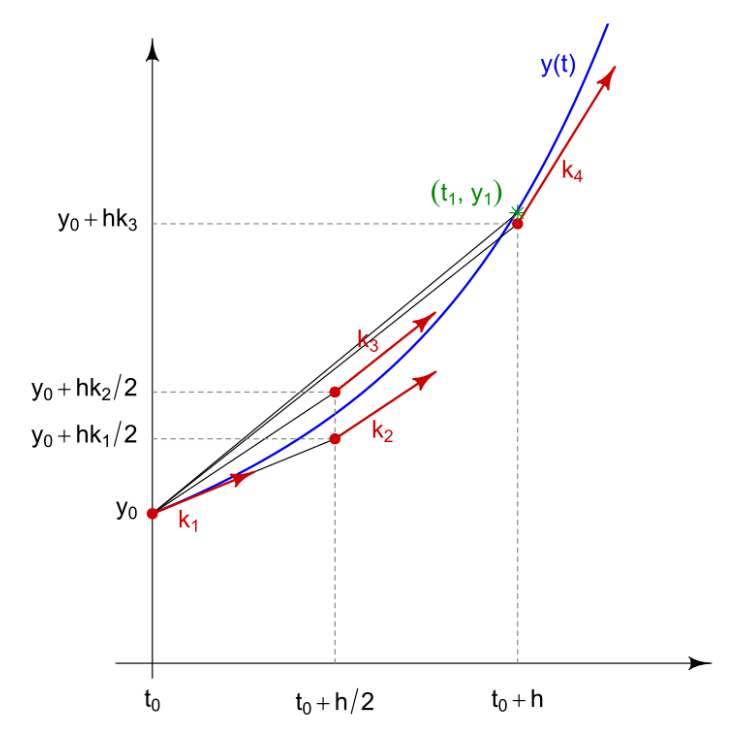

# solve the problem y' = y

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

# Define the function f
def f(t, y):
    return y

# Euler's Method
def euler_method(f, t_0, y_0, t_end, h):
    t_values = np.arange(t_0, t_end + h, h)
    y_values = np.zeros(len(t_values))
    y_values[0] = y_0
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i - 1] + h * f(t_values[i - 1], y_values[i - 1])
    return t_values, y_values

# RK4 Step Function
def rk4_step(f, y, t, h):
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5 * h, y + 0.5 * k1)
    k3 = h * f(t + 0.5 * h, y + 0.5 * k2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# RK4 Method
def rk4_method(f, t_0, y_0, t_end, h):
    t_values = np.arange(t_0, t_end + h, h)
    y_values = np.zeros(len(t_values))
    y_values[0] = y_0
    for i in range(1, len(t_values)):
        y_values[i] = rk4_step(f, y_values[i - 1], t_values[i - 1], h)
    return t_values, y_values

In [5]:
# Parameters
t_0 = 0
y_0 = 1
t_end = 4
h = 0.1

# Solve using Euler's method
t_euler, y_euler = euler_method(f, t_0, y_0, t_end, h)

# Solve using RK4 method
t_rk4, y_rk4 = rk4_method(f, t_0, y_0, t_end, h)

# Analytical solution
t_exact = np.linspace(t_0, t_end, 100)
y_exact = np.exp(t_exact)

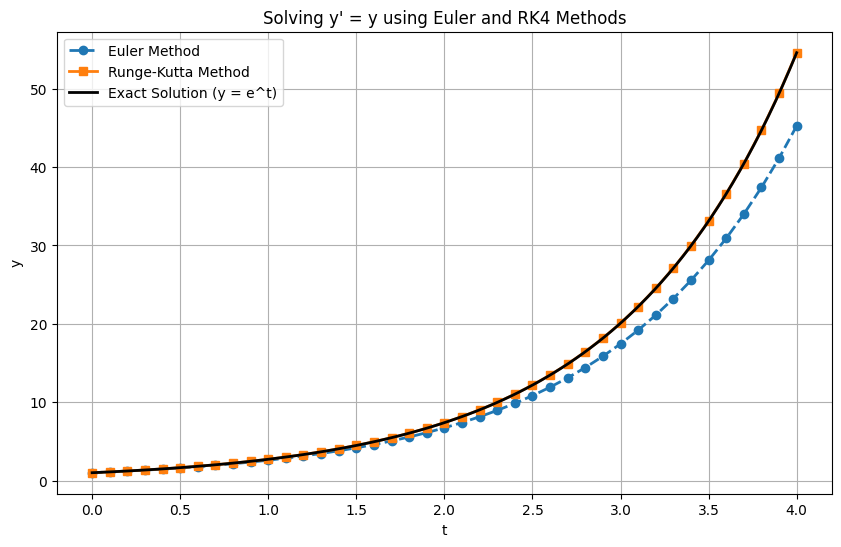

In [6]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_euler, y_euler, label="Euler Method", linestyle='--', marker='o', lw=2)
plt.plot(t_rk4, y_rk4, label="Runge-Kutta Method", linestyle='-', marker='s', lw=2)
plt.plot(t_exact, y_exact, label="Exact Solution (y = e^t)", color='black', lw=2)

plt.xlabel('t')
plt.ylabel('y')
plt.title("Solving y' = y using Euler and RK4 Methods")
plt.legend()
plt.grid(True)
plt.show()

# The Lorenz System

## Introduction
The Lorenz system, discovered by Edward Lorenz in 1963, is a system of ordinary differential equations that demonstrates chaotic behavior. It was originally derived as a simplified mathematical model for atmospheric convection and has become one of the most famous examples of chaos theory.

## Mathematical Description

### System Equations
The Lorenz system consists of three coupled nonlinear differential equations:

$\frac{dx}{dt} = \sigma(y - x)$

$\frac{dy}{dt} = x(\rho - z) - y$

$\frac{dz}{dt} = xy - \beta z$

where:
- $x$, $y$, and $z$ are the system variables
- $t$ is time
- $\sigma$, $\rho$, and $\beta$ are system parameters

### Classical Parameter Values
The standard parameter values that Lorenz used are:
- $\sigma = 10$ (Prandtl number)
- $\rho = 28$ (Rayleigh number)
- $\beta = \frac{8}{3}$ (Geometric factor)




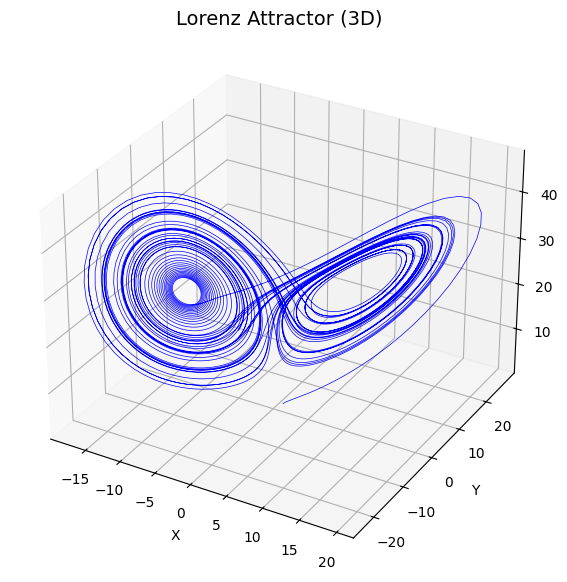

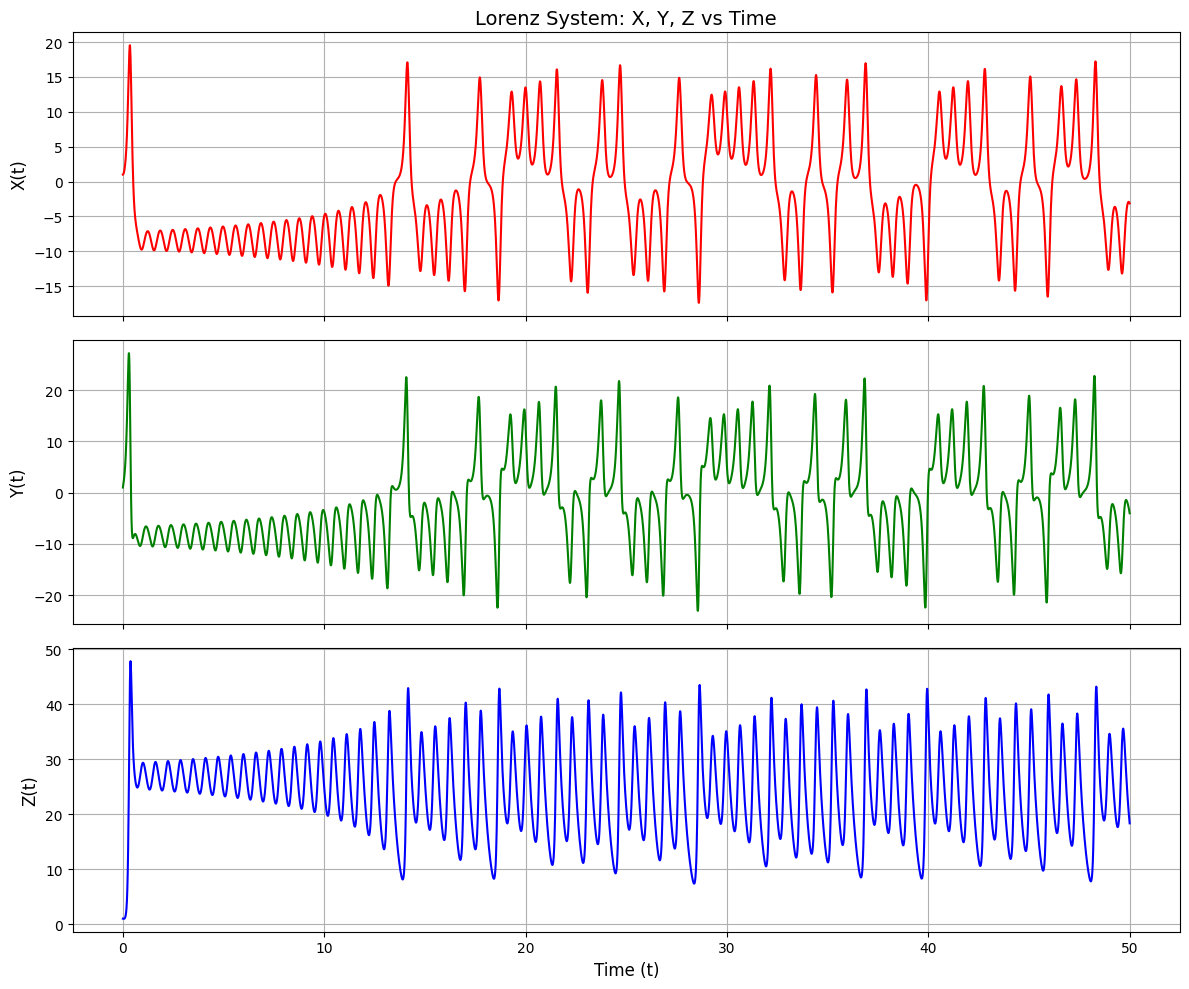

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Lorenz system equations
def lorenz_system(t, state, sigma=10, rho=28, beta=8/3):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])

# Runge-Kutta 4th Order Method for the Lorenz system
def rk4_lorenz(f, state_0, t_0, t_end, h, sigma=10, rho=28, beta=8/3):
    n_steps = int((t_end - t_0) / h)
    t_values = np.linspace(t_0, t_end, n_steps)
    states = np.zeros((n_steps, len(state_0)))
    states[0] = state_0
    
    for i in range(1, n_steps):
        t = t_values[i - 1]
        state = states[i - 1]
        k1 = h * f(t, state, sigma, rho, beta)
        k2 = h * f(t + 0.5 * h, state + 0.5 * k1, sigma, rho, beta)
        k3 = h * f(t + 0.5 * h, state + 0.5 * k2, sigma, rho, beta)
        k4 = h * f(t + h, state + k3, sigma, rho, beta)
        states[i] = state + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return t_values, states

# Initial conditions and parameters
t_0 = 0
t_end = 50
h = 0.01
state_0 = [1, 1, 1]  # Initial conditions for x, y, z

# Solve Lorenz system using RK4
t_values, states = rk4_lorenz(lorenz_system, state_0, t_0, t_end, h)

# Extract x, y, z
x, y, z = states[:, 0], states[:, 1], states[:, 2]

# 3D Plot of the Lorenz attractor
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5, color='blue')
ax.set_title("Lorenz Attractor (3D)", fontsize=14)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

# Time series plots: X, Y, Z vs Time
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

axs[0].plot(t_values, x, color='r', lw=1.5)
axs[0].set_ylabel("X(t)", fontsize=12)
axs[0].set_title("Lorenz System: X, Y, Z vs Time", fontsize=14)
axs[0].grid()

axs[1].plot(t_values, y, color='g', lw=1.5)
axs[1].set_ylabel("Y(t)", fontsize=12)
axs[1].grid()

axs[2].plot(t_values, z, color='b', lw=1.5)
axs[2].set_xlabel("Time (t)", fontsize=12)
axs[2].set_ylabel("Z(t)", fontsize=12)
axs[2].grid()

plt.tight_layout()
plt.show()


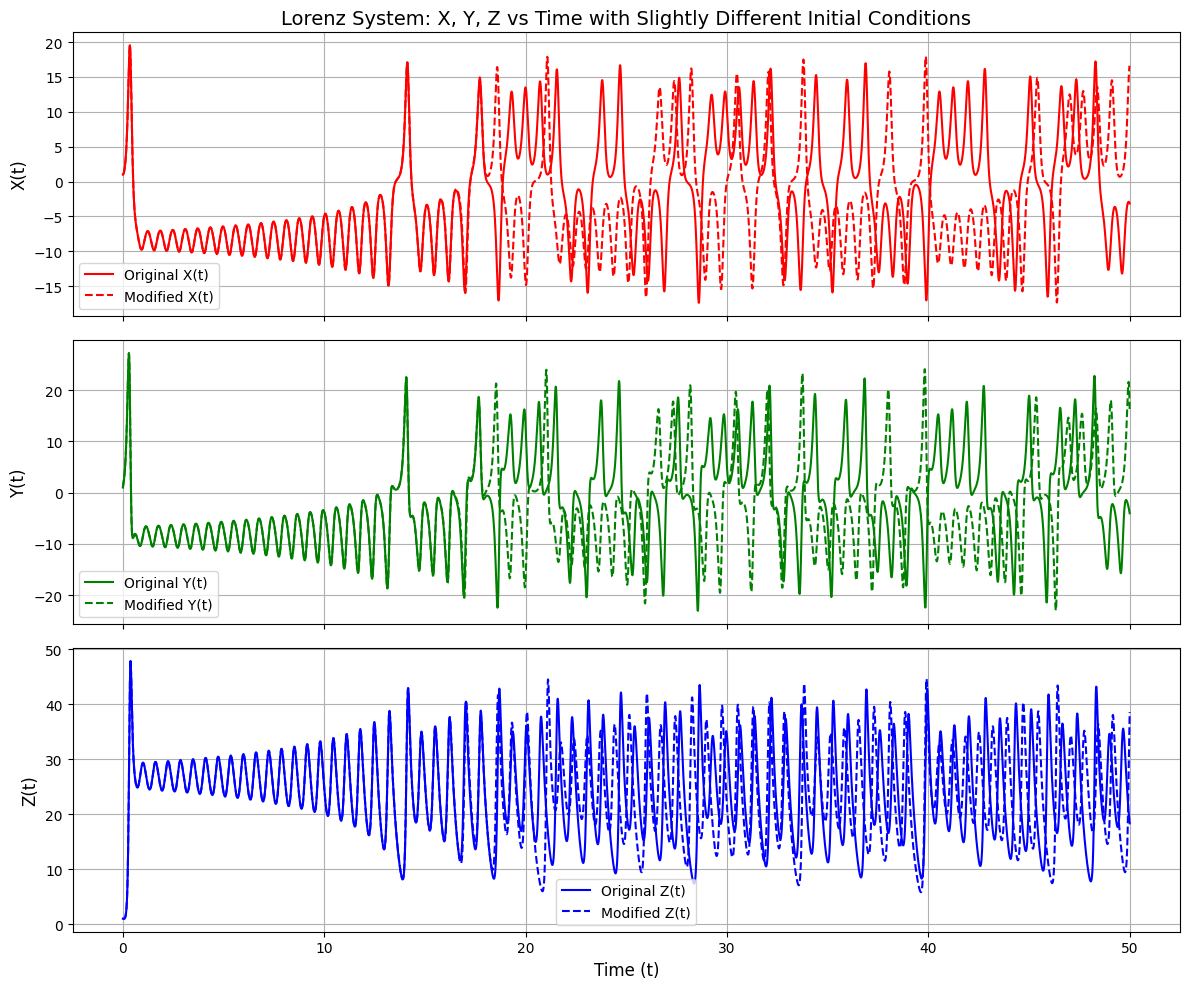

In [3]:
# Slightly modified initial conditions
state_0_modified = [1.001, 1.001, 1.001]  # Small change in the initial conditions

# Solve Lorenz system using RK4 for both initial conditions
t_values, states_original = rk4_lorenz(lorenz_system, state_0, t_0, t_end, h)
t_values, states_modified = rk4_lorenz(lorenz_system, state_0_modified, t_0, t_end, h)

# Extract x, y, z for both cases
x_original, y_original, z_original = states_original[:, 0], states_original[:, 1], states_original[:, 2]
x_modified, y_modified, z_modified = states_modified[:, 0], states_modified[:, 1], states_modified[:, 2]

# Plotting X, Y, Z vs Time on the same graph
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# X vs Time
axs[0].plot(t_values, x_original, label="Original X(t)", color='r', lw=1.5)
axs[0].plot(t_values, x_modified, label="Modified X(t)", color='r', linestyle='dashed', lw=1.5)
axs[0].set_ylabel("X(t)", fontsize=12)
axs[0].set_title("Lorenz System: X, Y, Z vs Time with Slightly Different Initial Conditions", fontsize=14)
axs[0].grid()
axs[0].legend()

# Y vs Time
axs[1].plot(t_values, y_original, label="Original Y(t)", color='g', lw=1.5)
axs[1].plot(t_values, y_modified, label="Modified Y(t)", color='g', linestyle='dashed', lw=1.5)
axs[1].set_ylabel("Y(t)", fontsize=12)
axs[1].grid()
axs[1].legend()

# Z vs Time
axs[2].plot(t_values, z_original, label="Original Z(t)", color='b', lw=1.5)
axs[2].plot(t_values, z_modified, label="Modified Z(t)", color='b', linestyle='dashed', lw=1.5)
axs[2].set_xlabel("Time (t)", fontsize=12)
axs[2].set_ylabel("Z(t)", fontsize=12)
axs[2].grid()
axs[2].legend()

plt.tight_layout()
plt.show()
